In [7]:
# do the necessary imports

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style='darkgrid')

Below we will define sigmoid activation functions and its 
derivative function to be later used in the binary classification 
Logistic Regression problem.

In [8]:
# define the sigmoid function
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

# define the sigmoid derivative function
def sigmoid_deriv(x):
    return x * (1 - x)

# define the predict function that makes predictions on inout 
# features based on the finally trained model
def predict(X: np.ndarray, W: np.ndarray):
    # take the dot product between features and weight matrix
    preds = sigmoid_activation(X.dot(W))

    # apply a step function to threshold the outputs to binary class
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

Now that we are done with creating the basic utility functions, we 
can create dummy matrices of data from the make_blobs() function 
from the scikit learn library.

In [9]:
# generate a 2 class classificatin problem with 1,000 data points
# where each datapoint is a 2D feature vector

X, y = make_blobs(n_samples=1000, n_features=2, centers=2,
                  cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))
# insert a column of 1's as the last entry in the feature matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of 
# the data for training and the remaining 50% for testing

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.5,
                                                random_state=42)

# initialise our weight matrix with random values
print(f"[INFO] training.....")
W = np.random.randn(X.shape[1], 1)
losses = []

[INFO] training.....


Now in the following for loop, we will use the initial random weight 
matrix W to generate an array of predicted trainY's and then we 
will compare them to the actual trainY's to evaluate the errors. 
The idea is to evaluate the least square error and then minimize it
 using Gradient Descent Algorithm. Each iteration will cause the 
 weight matrix change by small amounts across all dimensions as 
 dictated by the Gradient Descent and the learning rate. There are 
 no particular end criteria of the loop. It will only be continued 
 until a user defined number of epochs. 

In [10]:
# define the constants such as epoch number, and learning rate
epochs = 100
alpha = 0.01

# loop over the desired number of epochs
for epoch in np.arange(epochs + 1):
    # trainX.W will be a 500x1 vector of scores passed to the sigmoid
    # a 500x1 preds probability vector is then returned
    preds = sigmoid_activation(trainX.dot(W))

    # error is the difference between the 500x1 probability vector
    # and the 500x1 true trainY vector
    error = preds - trainY

    # aggregate all losses as square loss into a single  number
    loss = np.sum(error ** 2)
    losses.append(loss)
    
    # this is where we calculate the gradient 
    d = error * sigmoid_deriv(preds)
    gradient = trainX.T.dot(d)

    # now male the gradient descent update of the weight matrix
    W += -alpha * gradient

    # display loss info after every 5 epochs
    if epoch == 0 or (epoch) % 5 == 0:
        print(f'[INFO] epoch={epoch}, loss={loss}')

# once the training is done, evaluate our trained model with testX
print(f'[INFO] Evaluating model .......\n')
testPreds = predict(testX, W)
print(classification_report(testY, testPreds))

[INFO] epoch=0, loss=228.48988474189767
[INFO] epoch=5, loss=4.617991153031798
[INFO] epoch=10, loss=3.0757807762506517
[INFO] epoch=15, loss=2.4354305780597967
[INFO] epoch=20, loss=2.1087656198701006
[INFO] epoch=25, loss=1.9149380207811786
[INFO] epoch=30, loss=1.7735947745934832
[INFO] epoch=35, loss=1.6582635222004023
[INFO] epoch=40, loss=1.56053075842794
[INFO] epoch=45, loss=1.4762483284923147
[INFO] epoch=50, loss=1.4026593454651044
[INFO] epoch=55, loss=1.3377476415175136
[INFO] epoch=60, loss=1.2799851684769354
[INFO] epoch=65, loss=1.2281885759598326
[INFO] epoch=70, loss=1.1814258185747957
[INFO] epoch=75, loss=1.1389521237608824
[INFO] epoch=80, loss=1.1001647972997408
[INFO] epoch=85, loss=1.0645706201085707
[INFO] epoch=90, loss=1.031761890902405
[INFO] epoch=95, loss=1.001398535109613
[INFO] epoch=100, loss=0.9731945501019879
[INFO] Evaluating model .......

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
   

Below we will plot 2 graphs, one showing the variation of the 
square loss over time epochs and the other is a simple 
visualisation of the actual dataset.

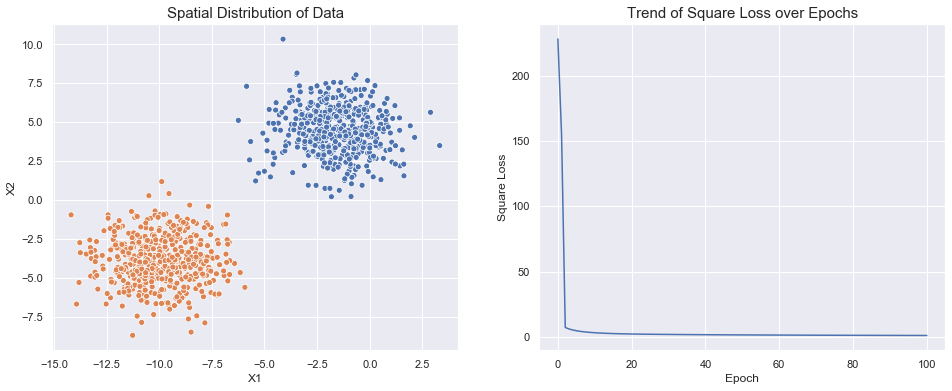

In [11]:
import matplotlib.axes._axes as axes
fig, ax = plt.subplots(1, 2, figsize=(16,6)) # type: _, axes.Axes

# graphing the datapoints
df_X = pd.DataFrame(data=X, columns=['X', 'Y', 'bias'])
df_Y = pd.Series(data=y[:,0], name='label')
df_X['class'] = df_Y

ax[0].set_title('Spatial Distribution of Data', fontsize=15)
sns.scatterplot(x='X', y='Y', ax=ax[0], data=df_X, hue='class', 
                legend=False);
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')

# grapjing the loss trend
epoch_list = range(0, 101)
ax[1].set_title('Trend of Square Loss over Epochs', fontsize=15)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Square Loss')
sns.lineplot(x=epoch_list, y=losses, ax=ax[1]);

From the classification report, we can see that our Logistic 
Regression model with randomly generated initial Weight matrix was 
eventually able to attain an accuracy of around 98% in the binary 
classification task. From the 2 graphs above, we can see that the 
task was rather easy since the point classes are easily separable. 
The trend of the square loss function shows an asymptotic decline 
in the first 10-15 epochs, eventually settling to a very low loss 
value by the end of the 100th epoch.